# 2nd-order shift HG00-HG00, matching basis, waist at gapless Half-plane PD



In [1]:
import PauLisa as pl, numpy as np, matplotlib.pyplot as plt
from scipy.special import erfi as erfi
pi=np.pi

### input

In [2]:
#spot, wavelength, shift
w= 1e-3
lam= 1064e-9
a = 100e-6  #100 micron shift

#alpha(10nrad)
alpha_min=0e-6
alpha_max=10e-6
num_points = 1000
alpha = np.linspace(alpha_min,alpha_max,num = num_points)

## PLOT SCALES AND LABELS
micro = 10**(6)
nano = 10**(9)
cycle = 1/(2*pi)
rad = 1
xlab = 'u'
ylab = 'rad'

##SET SCALES
alpha_scale = micro
phase_scale = rad

if(alpha_scale==nano):
    xlab = 'n'
if(phase_scale==cycle):
    ylab = 'cycles'

Overall DWS (1st-order in shift & tilt):

\begin{align*}
	\Delta \phi =
	\frac{1}{2}	
	\left[
	\arctan \frac{			\frac{\sqrt{2 \pi} \alpha }{2 \lambda}
			\left[
				w_0
				+
				\frac{\sqrt{2 \pi} a }{2}		
			\right]}{\left[
				\frac{1}{4}
				+
				\sqrt{\frac{2}{\pi}}\frac{a}{2 w_0}	
		\right]}
		-
	 \arctan \frac{			\frac{\sqrt{2 \pi} \alpha }{2 \lambda}
			\left[
				-w_0
				+
				\frac{\sqrt{2 \pi} a }{2}		
			\right]}{\left[
				\frac{1}{4}
				-
				\sqrt{\frac{2}{\pi}}\frac{a}{2 w_0}	
		\right]}		
	\right]
\end{align*}

A shifted HG00 to second-order is

\begin{align*}
		u_{00}(x-a,y,0) 
			=&\Big(\frac{2}{\pi}\Big)^{-1/2}
			\Big(\frac{1}{w_{0}}\Big)
			\exp\Big(-\frac{(x-a)^{2}+y^{2}}{w_{0}^{2}}\Big)
		\nonumber\\	
			= & \Big(\frac{2}{\pi}\Big)^{-1/2} 
			\Big(\frac{1}{w_{0}}\Big)
			\exp\Big(-\frac{y^{2}}{w_{0}^{2}}\Big)
			\exp\Big(-\frac{(x-a)^{2}}{w_{0}^{2}}\Big)
			\nonumber\\	
			= &
			\Big(\frac{2}{\pi}\Big)^{-1/2} 
			\Big(\frac{1}{w_{0}}\Big)
			\exp\Big(-\frac{y^{2}}{w_{0}^{2}}\Big)
			\exp\Big(-\frac{x^2}{w_{0}^{2}}\Big)
			\exp\Big(-\frac{(a^2-2ax)}{w_{0}^{2}}\Big)
		\nonumber\\	
			= & u_{00}(x,y,0) \times exp \Big( \frac{2ax - a^{2}}{w_{0}^2} 			\Big)
		\nonumber\\
			=	& u_{00}(x,y,0)
			\left[ 
			1+ \frac{2ax}{w_{0}^{2}}
			+ \frac{a^2(2x^2-w_0^2)}{w_0^4}			
			+ \mathcal{O} \frac{a}{w}^{3} \right]
		\nonumber\\ 
		\nonumber\approx	& 
		u_{00} 
		+ \frac{2ax}{w_{0}^{2}} u_{00}
		+ a^2
		(
			\frac{2x^2}{w_0^4}
			-
			\frac{1}{w_0^2} 
		)
		u_{00}
			\\
	= &
	u_{00}(x,y,0)
	+ 
	\frac{a}{w_{0}}u_{10}(x,y,0) 
	+
	a^2
		(
			\frac{1}{\sqrt{2}w_0^2} u_{20}
			-			
			\frac{1}{2w_0^2} u_{00}
		)
	\;.
\end{align*}

\begin{align*}
	\Delta \phi = &
		 \frac{1}{2} 
		 \left[
		 	\phi_R - \phi_L
		 \right]
		 \\ = &
		 \frac{1}{2}
		 \left[
							\arctan
				\left[
					\frac
					{ \frac{\pi \alpha}{\lambda}
					\left[
						a 
						+
						\sqrt{\frac{2}{\pi}} w_0
					\right]}					
				{1
				+
				 \sqrt{\frac{2}{\pi}} \frac{a}{w_0}
				 		-\frac{1}{16}\alpha^2 k^2 
	[
	 w_0^2
	+ 
	a w_0(
		5
	\sqrt{\frac{2}{\pi}}
	)
	]			 
				 }
				\right]
		-
			\arctan
				\left[
					\frac
					{ \frac{\pi \alpha}{\lambda}
					\left[
						a 
						-
						\sqrt{\frac{2}{\pi}} w_0
					\right]}					
				{1
				-
				 \sqrt{\frac{2}{\pi}} \frac{a}{w_0}
	-\frac{1}{16}
	\alpha^2 k^2 
	[
	 w_0^2
	- 
	a w_0(
			5
	\sqrt{\frac{2}{\pi}}
	)
	]			 
				 }
				\right]
			\right]							 	
\end{align*}

In [3]:
#signals    
def phase_diff(alpha,a):
    phase_result=(0.50*(phi_r(alpha,a)-phi_l(alpha,a) ))
    return(phase_result)

def gws(alpha,a):
    gws_result=(0.50*(phi_r(alpha,a)+phi_l(alpha,a) ))
    return(gws_result)

#shifts
def second_order_shift_num_r(alpha,a):
    result= (
                (np.sqrt(2*pi) * a**2 *alpha / (4*lam*w))
                +
                (3*np.sqrt(2*pi) * a**2 / 4*w**2)*(2*alpha/lam)
            )
    return(result)

def second_order_shift_num_l(alpha,a):
    result= (
                -(np.sqrt(2*pi) * a**2 *alpha / (4*lam*w))
                -
                (3*np.sqrt(2*pi) * a**2 / 4*w**2)*(2*alpha/lam)
            )
    return(result)

def second_order_shift_den(alpha,a):
    result= (
                -a**2* (1/(4*w**2))
            )
    return(result)

#PHASE right and left
def phi_r(alpha,a):
    return(np.arctan 
            (
                (
                    (pi*alpha/lam)*
                    (
                        a
                        +
                        np.sqrt(2/pi)*w
                    )
                )  
                    /
                    (
                        1
                        +
                        np.sqrt(2/pi)*(a/w)
                        +
                        second_order_shift_den(alpha,a)
                    )
            )
    )

def phi_l(alpha,a):
    return(np.arctan 
        (
            (
                (pi*alpha/lam)*
                (
                    a
                    -
                    np.sqrt(2/pi)*w
                )
            )  
                /
                (
                    1
                    -
                    np.sqrt(2/pi)*(a/w)
                    +
                    second_order_shift_den(alpha,a)
                )
        )
    )

a=10e-6
second_shift_dws10=phase_diff(alpha,a)
second_shift_lps10=gws(alpha,a)

a=100e-6
second_shift_dws100=phase_diff(alpha,a)
second_shift_lps100=gws(alpha,a)


In [4]:
#signals    
def phase_diff(alpha,a):
    phase_result=(0.50*(phi_r(alpha,a)-phi_l(alpha,a) ))
    return(phase_result)

def gws(alpha,a):
    gws_result=(0.50*(phi_r(alpha,a)+phi_l(alpha,a) ))
    return(gws_result)



#PHASE right and left
def phi_r(alpha,a):
    return(np.arctan 
            (
                (
                    (pi*alpha/lam)*
                    (
                        a
                        +
                        np.sqrt(2/pi)*w
                    )
                )  
                    /
                    (
                        1
                        +
                        np.sqrt(2/pi)*(a/w)
                    )
            )
    )

def phi_l(alpha,a):
    return(np.arctan 
        (
            (
                (pi*alpha/lam)*
                (
                    a
                    -
                    np.sqrt(2/pi)*w
                )
            )  
                /
                (
                    1
                    -
                    np.sqrt(2/pi)*(a/w)
                )
        )
    )
a=10e-6
dws10=phase_diff(alpha,10e-6)
lps10=gws(alpha,10e-6)

a=100e-6
dws100=phase_diff(alpha,100e-6)
lps100=gws(alpha,100e-6)




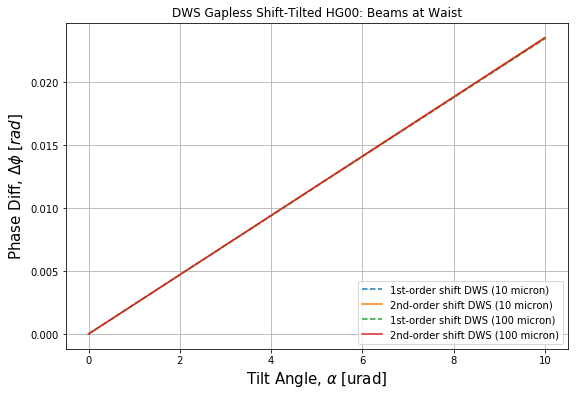

In [5]:
#plot (a*1e6 for microrad, diff/2pi for cycles)
plt.figure(figsize=(9,6))

plt.plot(alpha*alpha_scale, dws10,'--', label='1st-order shift DWS (10 micron)') 
plt.plot(alpha*alpha_scale, second_shift_dws10, label='2nd-order shift DWS (10 micron)')
plt.plot(alpha*alpha_scale, dws100,'--', label='1st-order shift DWS (100 micron)') 
plt.plot(alpha*alpha_scale, second_shift_dws100, label='2nd-order shift DWS (100 micron)')

axes = plt.gca()
#axes.set_ylim([-.001,.001])
#axes.set_xlim([-10e-6,10e-6])

plt.legend(loc='lower right')

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + xlab +'rad]', fontsize=15) 
plt.ylabel(r'Phase Diff, $\Delta \phi\;[' + ylab + ']$', fontsize=15) 
plt.title(r'DWS Gapless Shift-Tilted HG00: Beams at Waist') 
plt.grid() 
#plt.savefig("tilt-shift-waist-2shift.pdf")


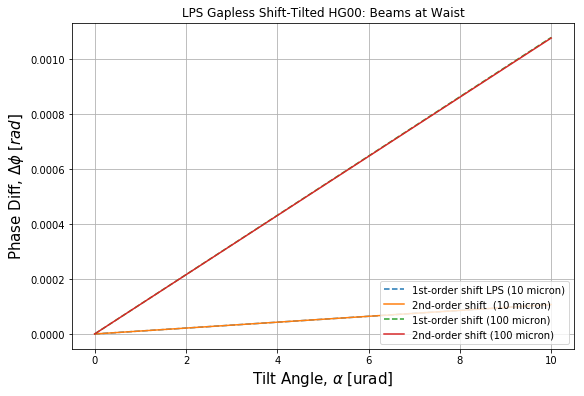

In [6]:
#plot (a*1e6 for microrad, diff/2pi for cycles)
plt.figure(figsize=(9,6))

plt.plot(alpha*alpha_scale, lps10,'--', label='1st-order shift LPS (10 micron)') 
plt.plot(alpha*alpha_scale, second_shift_lps10, label='2nd-order shift  (10 micron)')
plt.plot(alpha*alpha_scale, lps100,'--', label='1st-order shift (100 micron)') 
plt.plot(alpha*alpha_scale, second_shift_lps100, label='2nd-order shift (100 micron)')

axes = plt.gca()
#axes.set_ylim([-.001,.001])
#axes.set_xlim([-10e-6,10e-6])

plt.legend(loc='lower right')

plt.xlabel(r'Tilt Angle, $\alpha\;$[' + xlab +'rad]', fontsize=15) 
plt.ylabel(r'Phase Diff, $\Delta \phi\;[' + ylab + ']$', fontsize=15) 
plt.title(r'LPS Gapless Shift-Tilted HG00: Beams at Waist') 
plt.grid() 
#plt.savefig("tilt-shift-waist-2shift.pdf")


### Computed Deriv. 
$\frac{d \Delta \phi}{d \alpha}$

In [7]:
#function
deriv1_dws10 = np.diff(dws10) / np.diff(alpha)
deriv1_lps10 = np.diff(lps10) / np.diff(alpha)
deriv1_dws100 = np.diff(dws100) / np.diff(alpha)
deriv1_lps100 = np.diff(lps100) / np.diff(alpha)

deriv2_dws10 = np.diff(second_shift_dws10) / np.diff(alpha)
deriv2_lps10 = np.diff(second_shift_lps10) / np.diff(alpha)
deriv2_dws100 = np.diff(second_shift_dws100) / np.diff(alpha)
deriv2_lps100 = np.diff(second_shift_lps100) / np.diff(alpha)

##
alpha2 = (alpha[:-1] + alpha[1:]) / 2




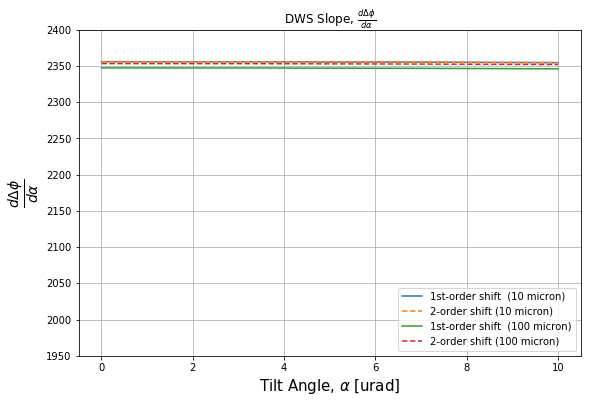

In [8]:
#plot (a*1e6 for microrad, diff/2pi for cycles)
plt.figure(figsize=(9,6))

plt.plot(alpha2*alpha_scale, deriv1_dws10*phase_scale, label='1st-order shift  (10 micron)') 
plt.plot(alpha2*alpha_scale, deriv2_dws10*phase_scale, '--', label='2-order shift (10 micron)')
plt.plot(alpha2*alpha_scale, deriv1_dws100*phase_scale, label='1st-order shift  (100 micron)') 
plt.plot(alpha2*alpha_scale, deriv2_dws100*phase_scale, '--', label='2-order shift (100 micron)') 

axes = plt.gca()
axes.set_ylim([1950,2400])

plt.legend(loc='lower right')
plt.xlabel(r'Tilt Angle, $\alpha\;$[' + xlab +'rad]',fontsize=15) 
plt.ylabel(r'$ \frac{d \Delta \phi}{d \alpha}$', fontsize=20) 
plt.title(r'DWS Slope, $\frac{d \Delta \phi}{d \alpha}$') 
plt.grid()
#plt.savefig("tilt-shift-waist-2shift-DER.pdf")

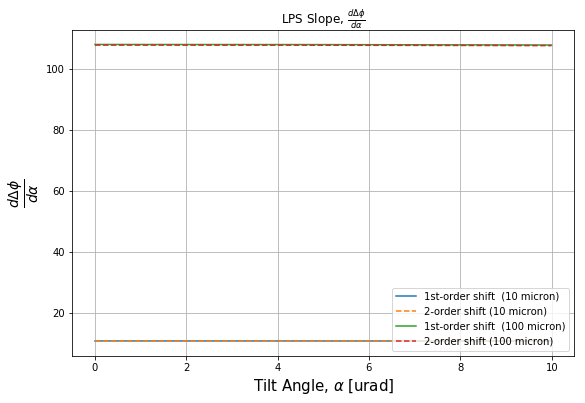

In [9]:
#plot (a*1e6 for microrad, diff/2pi for cycles)
plt.figure(figsize=(9,6))

plt.plot(alpha2*alpha_scale, deriv1_lps10*phase_scale, label='1st-order shift  (10 micron)') 
plt.plot(alpha2*alpha_scale, deriv2_lps10*phase_scale, '--', label='2-order shift (10 micron)')
plt.plot(alpha2*alpha_scale, deriv1_lps100*phase_scale, label='1st-order shift  (100 micron)') 
plt.plot(alpha2*alpha_scale, deriv2_lps100*phase_scale, '--', label='2-order shift (100 micron)') 

axes = plt.gca()
#axes.set_ylim([10,15])

plt.legend(loc='lower right')
plt.xlabel(r'Tilt Angle, $\alpha\;$[' + xlab +'rad]',fontsize=15) 
plt.ylabel(r'$ \frac{d \Delta \phi}{d \alpha}$', fontsize=20) 
plt.title(r'LPS Slope, $\frac{d \Delta \phi}{d \alpha}$') 
plt.grid()
#plt.savefig("tilt-shift-waist-2shift-DER.pdf")